In [1]:
# Set-up
%matplotlib inline
import matplotlib.pyplot as plt

# Python add-ons
import numpy as np
import pandas as pd

# 1. Variability metrics validation

In [2]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

VM = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    VM['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    VM['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 1.1. Sky conditions

<Figure size 640x480 with 0 Axes>

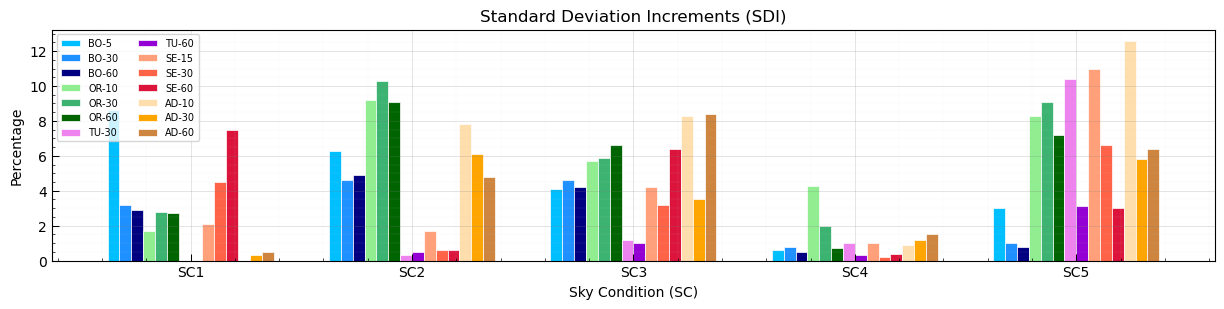

<Figure size 640x480 with 0 Axes>

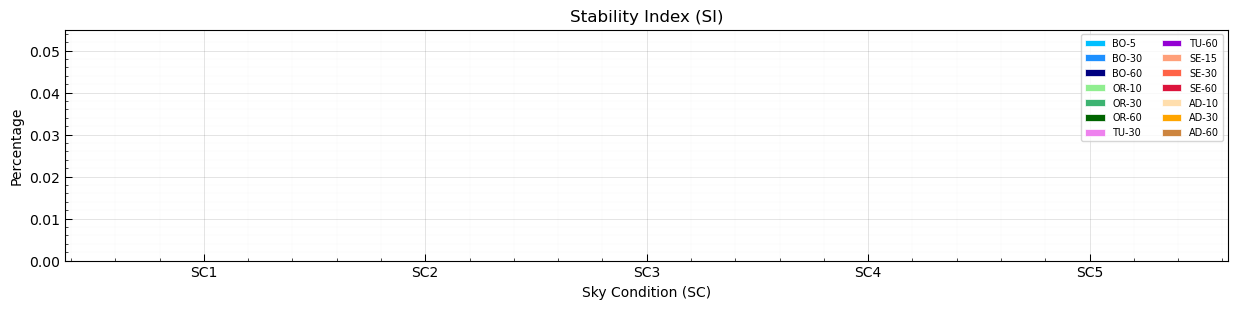

<Figure size 640x480 with 0 Axes>

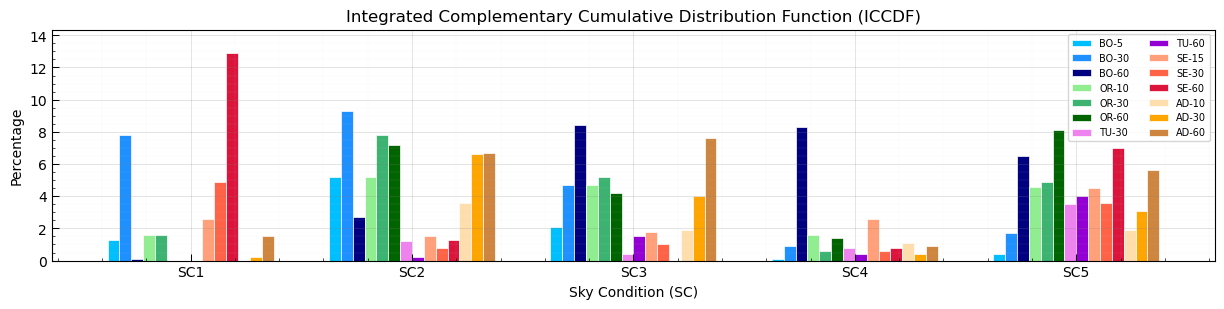

<Figure size 640x480 with 0 Axes>

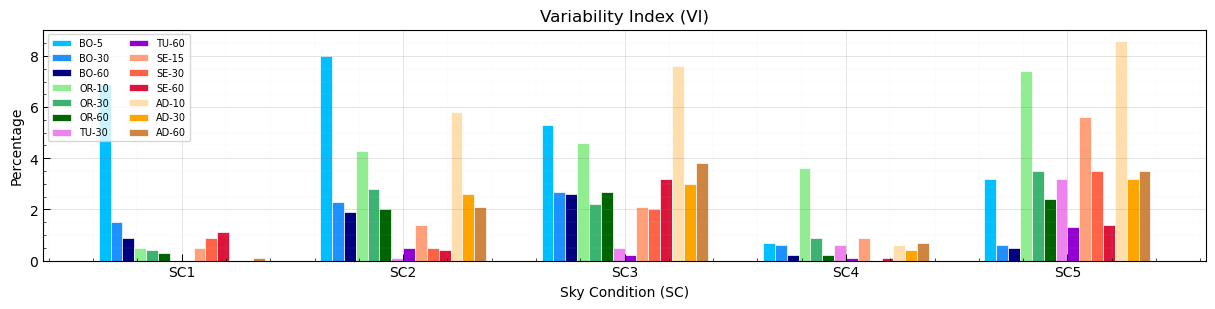

In [3]:
hor = 15
ver = 3

labels = []
colors = []

for i in FILE:
    # Labels
    a = i.split(sep='-')[0][0:2].upper()
    b = i.split(sep='-')[1]

    labels.append(f'{a}-{b}')

    # Colors
    if a == 'BO':
        if b == '30':
            colors.append('dodgerblue')
        elif b == '60':
            colors.append('navy')
        else:
            colors.append('deepskyblue')
    elif a == 'OR':
        if b == '30':
            colors.append('mediumseagreen')
        elif b == '60':
            colors.append('darkgreen')
        else:
            colors.append('lightgreen')
    elif a == 'TU':
        if b == '30':
            colors.append('violet')
        else:
            colors.append('darkviolet')
    elif a == 'SE':
        if b == '30':
            colors.append('tomato')
        elif b == '60':
            colors.append('crimson')
        else:
            colors.append('lightsalmon')
    else:
        if b == '30':
            colors.append('orange')
        elif b == '60':
            colors.append('peru')
        else:
            colors.append('navajowhite')

for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = VM['BOOTSTRAP_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig12{n}.pdf', dpi=300, bbox_inches='tight')

In [4]:
df.astype(dtype=float).describe()

,SC1,SC2,SC3,SC4,SC5
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.935714,2.478571,3.035714,0.685714,3.421429
std,1.780064,2.230274,1.892336,0.890857,2.380749
min,0.000000,0.100000,0.200000,0.000000,0.500000
25%,0.025000,0.725000,2.125000,0.200000,1.650000
50%,0.450000,2.050000,2.700000,0.600000,3.200000
75%,0.900000,2.750000,3.650000,0.700000,3.500000
max,6.900000,8.000000,7.600000,3.600000,8.600000


In [5]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,1.5,2.1,0.6,1.4,2.1
std,1.0,1.3,0.9,1.4,1.7
min,0.6,0.4,0.0,0.1,0.0
25%,0.6,0.9,0.3,0.5,0.6
50%,1.5,2.7,0.4,0.9,2.6
75%,2.3,2.8,0.4,2.1,3.5
max,2.7,3.5,2.2,3.5,3.8


## 1.2. Months

<Figure size 640x480 with 0 Axes>

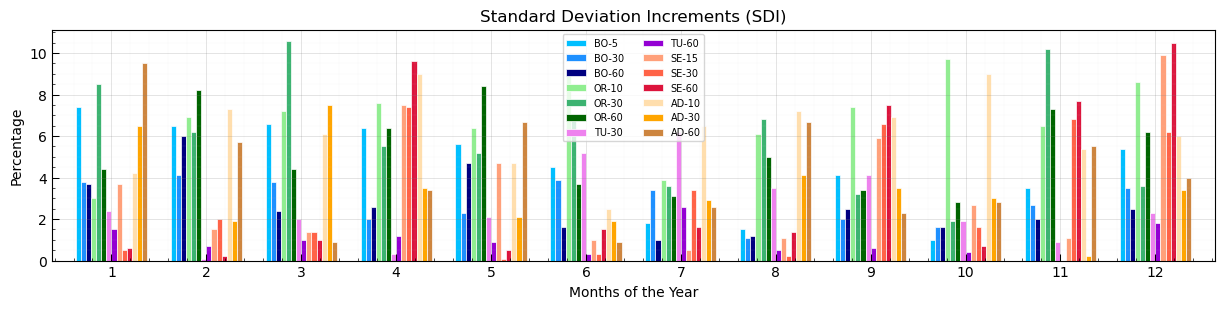

<Figure size 640x480 with 0 Axes>

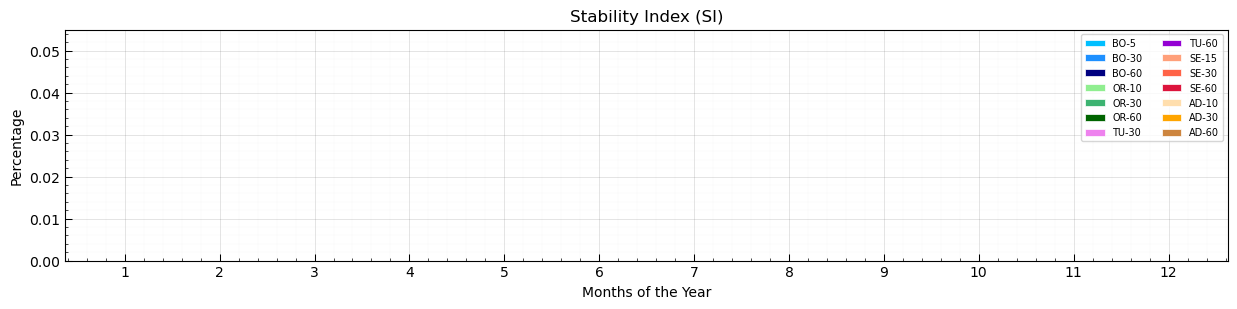

<Figure size 640x480 with 0 Axes>

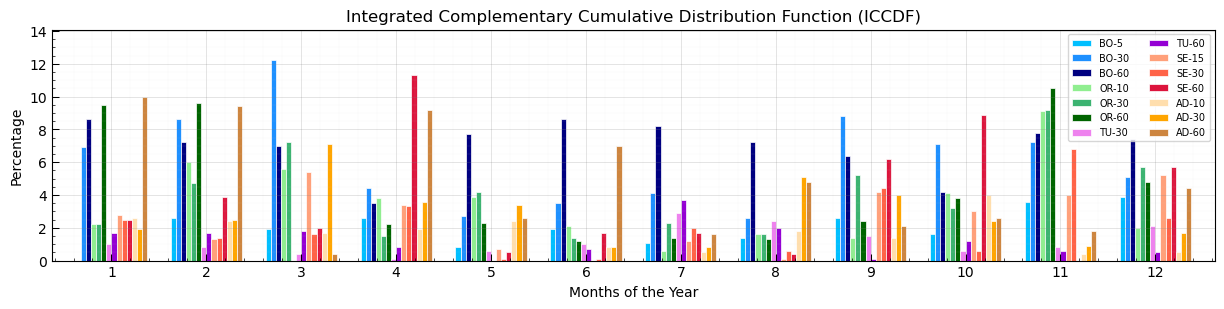

<Figure size 640x480 with 0 Axes>

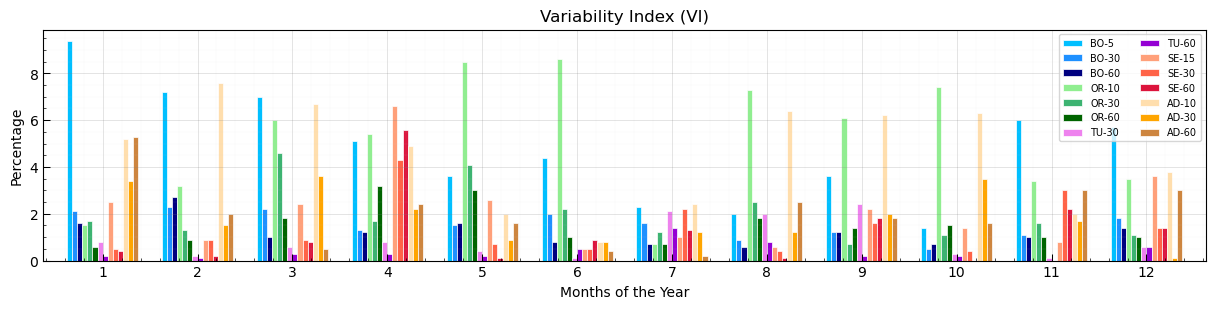

In [6]:
for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = VM['BOOTSTRAP_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig13{n}.pdf', dpi=300, bbox_inches='tight')

In [7]:
df.astype(dtype=float).describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.514286,2.214286,2.742857,3.214286,2.20000,1.678571,1.357143,2.078571,2.314286,1.878571,1.921429,2.071429
std,2.577374,2.389676,2.412695,2.066903,2.19965,2.276360,0.685806,2.171203,1.811016,2.291516,1.569507,1.596356
min,0.200000,0.100000,0.300000,0.300000,0.10000,0.100000,0.200000,0.100000,0.200000,0.000000,0.000000,0.100000
25%,0.650000,0.900000,0.825000,1.400000,0.75000,0.500000,0.775000,0.650000,1.250000,0.425000,1.000000,1.025000
50%,1.650000,1.400000,2.000000,2.800000,1.60000,0.800000,1.250000,1.500000,1.800000,1.250000,1.650000,1.400000
75%,3.175000,2.600000,4.350000,5.050000,2.90000,1.750000,1.975000,2.375000,2.350000,1.575000,2.800000,3.375000
max,9.400000,7.600000,7.000000,6.600000,8.50000,8.600000,2.400000,7.300000,6.200000,7.400000,6.000000,5.700000


In [8]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,1.6,2.1,0.6,1.4,2.5
std,0.6,1.2,0.5,1.4,1.2
min,0.7,0.7,0.0,0.4,0.8
25%,1.2,1.4,0.3,0.5,1.9
50%,1.6,1.6,0.5,0.9,2.2
75%,2.0,2.7,0.8,1.5,3.1
max,2.7,4.6,1.8,5.6,5.2


# 2. Statistical distribution validations

In [9]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

SD = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    SD['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    SD['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 2.1. Sky conditions

<Figure size 640x480 with 0 Axes>

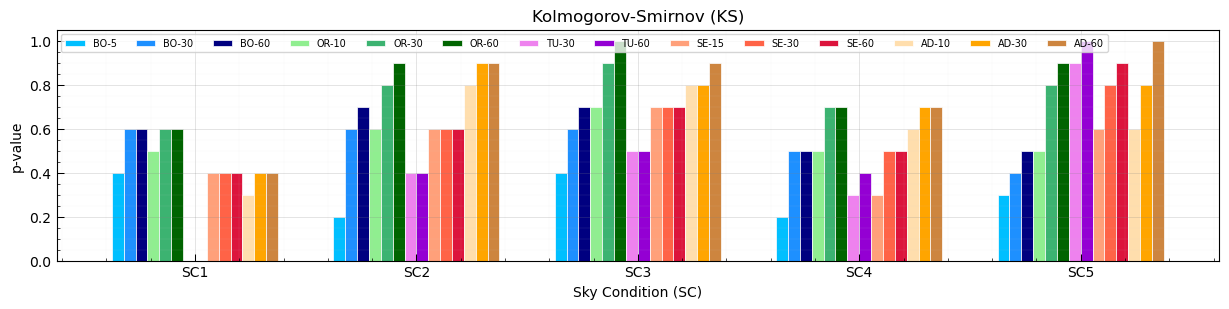

<Figure size 640x480 with 0 Axes>

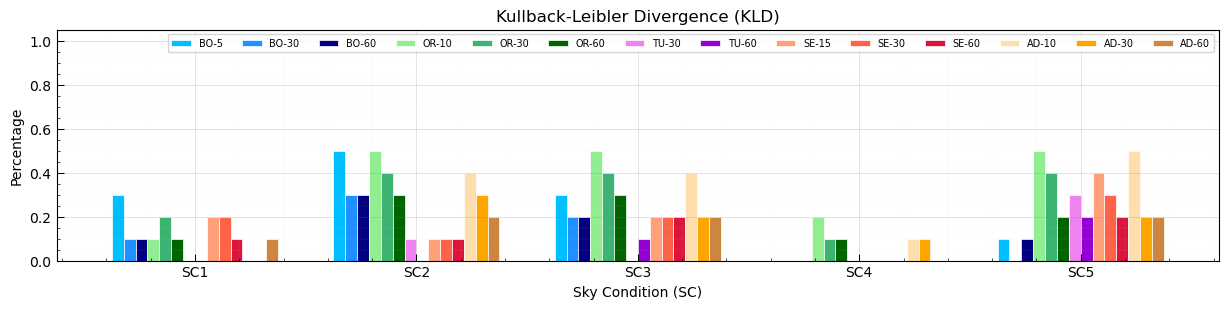

<Figure size 640x480 with 0 Axes>

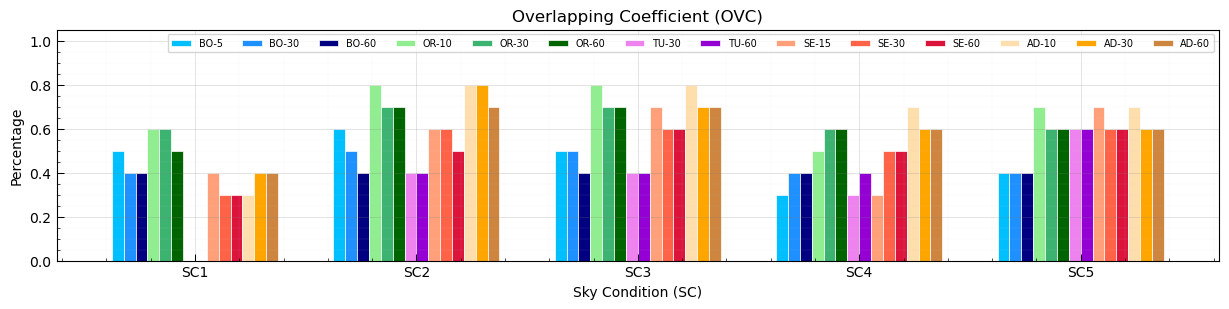

In [10]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS)'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD)'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC)'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = SD['BOOTSTRAP_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel(fig_ylabel)
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig16{n}.pdf', dpi=300, bbox_inches='tight')

In [11]:
df.astype(dtype=float).describe()

,SC1,SC2,SC3,SC4,SC5
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.364286,0.607143,0.607143,0.478571,0.578571
std,0.182323,0.149174,0.143925,0.131140,0.105090
min,0.000000,0.400000,0.400000,0.300000,0.400000
25%,0.300000,0.500000,0.500000,0.400000,0.600000
50%,0.400000,0.600000,0.650000,0.500000,0.600000
75%,0.475000,0.700000,0.700000,0.600000,0.600000
max,0.600000,0.800000,0.800000,0.700000,0.700000


In [12]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,0.4,0.6,0.4,0.5,0.6
std,0.1,0.1,0.2,0.1,0.1
min,0.4,0.6,0.0,0.3,0.4
25%,0.4,0.6,0.4,0.5,0.6
50%,0.4,0.6,0.4,0.6,0.6
75%,0.5,0.7,0.4,0.6,0.7
max,0.5,0.7,0.6,0.6,0.8


## 2.2. Months

<Figure size 640x480 with 0 Axes>

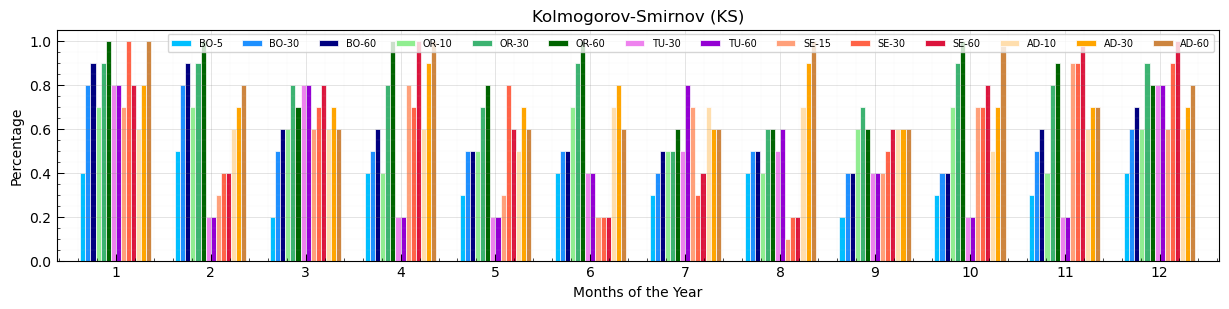

<Figure size 640x480 with 0 Axes>

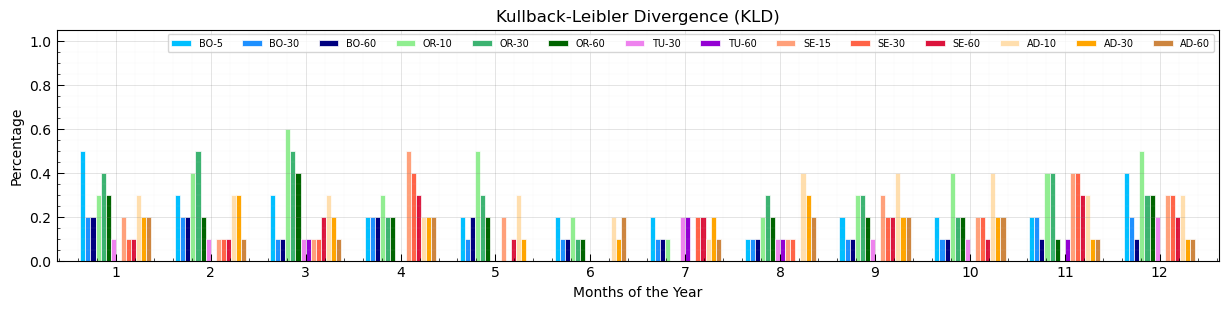

<Figure size 640x480 with 0 Axes>

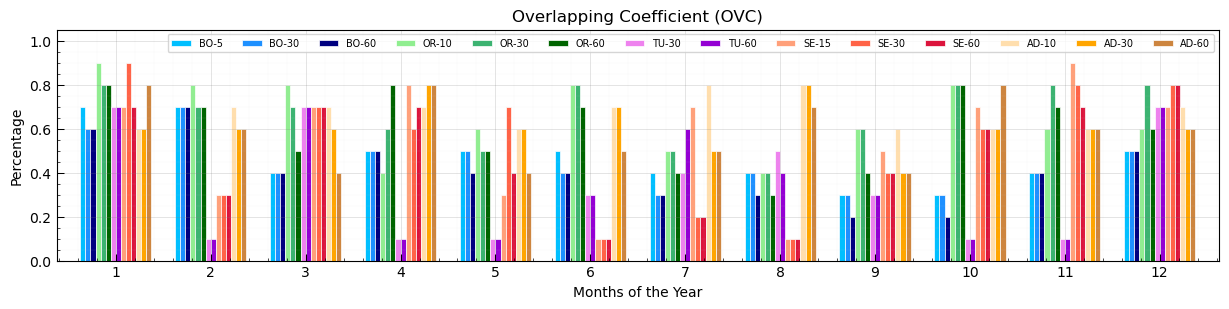

In [13]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS)'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD)'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC)'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = SD['BOOTSTRAP_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1, 1))
    plt.savefig(f'../figs/fig17{n}.pdf', dpi=300, bbox_inches='tight')

In [14]:
df.astype(dtype=float).describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.721429,0.521429,0.60000,0.564286,0.442857,0.457143,0.450000,0.407143,0.407143,0.521429,0.550000,0.650000
std,0.105090,0.245509,0.14676,0.237316,0.178516,0.256348,0.174312,0.233582,0.126881,0.266541,0.244163,0.109193
min,0.600000,0.100000,0.40000,0.100000,0.100000,0.100000,0.200000,0.100000,0.200000,0.100000,0.100000,0.500000
25%,0.625000,0.300000,0.42500,0.500000,0.400000,0.300000,0.325000,0.300000,0.300000,0.300000,0.400000,0.600000
50%,0.700000,0.650000,0.70000,0.600000,0.500000,0.450000,0.450000,0.400000,0.400000,0.600000,0.600000,0.650000
75%,0.800000,0.700000,0.70000,0.775000,0.575000,0.700000,0.500000,0.475000,0.475000,0.775000,0.700000,0.700000
max,0.900000,0.800000,0.80000,0.800000,0.700000,0.800000,0.800000,0.800000,0.600000,0.800000,0.900000,0.800000


In [15]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,0.4,0.6,0.3,0.5,0.6
std,0.1,0.1,0.3,0.3,0.1
min,0.3,0.4,0.1,0.1,0.4
25%,0.4,0.6,0.1,0.3,0.6
50%,0.4,0.6,0.3,0.5,0.6
75%,0.5,0.7,0.6,0.7,0.6
max,0.7,0.8,0.7,0.8,0.8


# 3. Energy production validation

In [16]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

EM = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    EM['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    EM['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 3.1. Sky conditions

<Figure size 640x480 with 0 Axes>

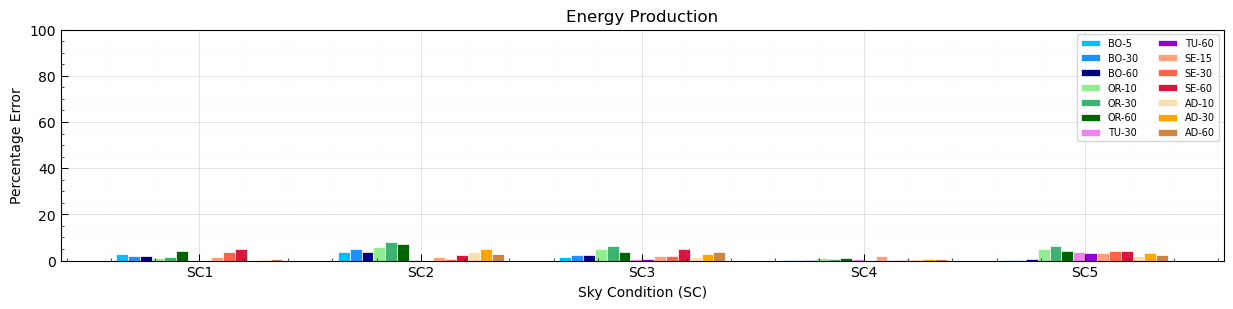

In [17]:
fig_title = 'Energy Production'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

for j in FILE:
    df.loc[j] = EM['BOOTSTRAP_SC'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel(fig_ylabel)
plt.xlabel('Sky Condition (SC)')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, 100)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig19a.pdf', dpi=300, bbox_inches='tight')

In [18]:
df.astype(dtype=float).describe()

,SC1,SC2,SC3,SC4,SC5
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.771429,3.585714,2.864286,0.678571,3.050000
std,1.624064,2.446617,1.738083,0.563203,1.756636
min,0.000000,0.000000,0.600000,0.000000,0.300000
25%,0.350000,1.800000,1.625000,0.325000,2.050000
50%,1.500000,3.750000,2.450000,0.650000,3.300000
75%,2.575000,5.000000,3.800000,0.800000,4.100000
max,5.000000,7.900000,6.500000,2.200000,6.100000


In [19]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,1.8,4.0,1.0,2.4,2.0
std,1.5,2.6,1.5,1.6,1.5
min,0.3,1.1,0.0,0.4,0.2
25%,0.3,1.6,0.2,1.6,0.7
50%,2.2,5.0,0.3,2.1,2.5
75%,2.4,5.2,0.7,3.9,2.7
max,3.8,7.3,3.6,4.1,3.8


## 3.2. Months

<Figure size 640x480 with 0 Axes>

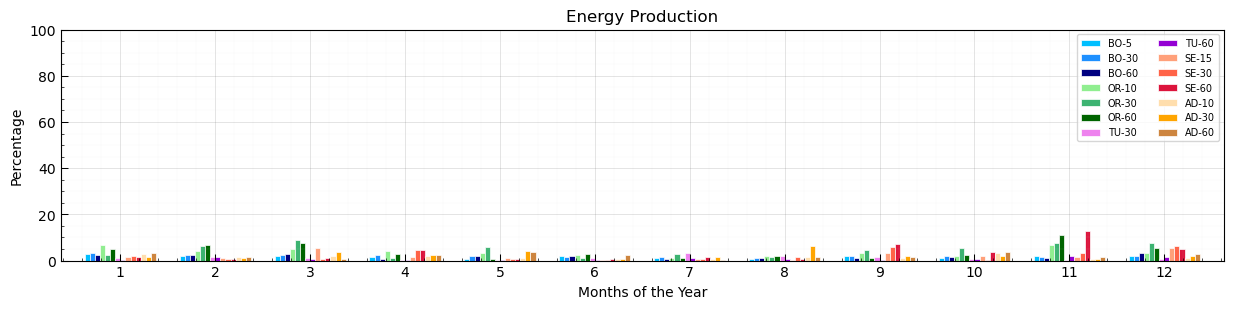

In [20]:
fig_title = 'Energy Production'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

for j in FILE:
    df.loc[j] = EM['BOOTSTRAP_MONTH'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel('Percentage')
plt.xlabel('Months of the Year')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, 100)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig19b.pdf', dpi=300, bbox_inches='tight')

In [21]:
df.astype(dtype=float).describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.635714,2.407143,3.200000,2.242857,1.900000,1.278571,1.314286,1.614286,2.657143,2.185714,3.764286,3.478571
std,1.611787,1.914505,2.697862,1.474248,1.694334,0.895440,0.802743,1.518024,1.901705,1.467524,4.075746,2.043443
min,0.400000,0.700000,0.600000,0.200000,0.100000,0.100000,0.100000,0.100000,0.400000,0.400000,0.400000,0.900000
25%,1.525000,1.325000,1.075000,1.200000,0.700000,0.575000,0.900000,0.850000,1.300000,1.225000,1.275000,1.925000
50%,2.600000,1.600000,2.350000,2.150000,1.100000,1.100000,1.100000,1.400000,2.050000,1.850000,1.750000,3.050000
75%,3.075000,2.300000,4.825000,2.750000,2.875000,1.875000,1.575000,1.750000,3.325000,3.200000,5.925000,5.300000
max,6.600000,6.700000,8.900000,4.700000,5.800000,3.000000,3.100000,6.500000,7.000000,5.400000,12.700000,7.400000


In [22]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,1.9,4.1,1.0,2.3,1.9
std,0.5,2.2,0.6,2.0,1.0
min,1.0,1.1,0.2,0.3,0.6
25%,1.7,2.6,0.5,0.8,1.3
50%,1.9,3.1,0.9,1.5,1.8
75%,2.2,5.6,1.3,3.6,2.5
max,2.8,7.8,2.2,5.7,3.6
